# MILESTONE 2

In order to get a feel for what we're trying to achieve in our project, you'll find below a descriptive analysis of 3 specificaly curated subsets of the Reddit dataset.
These datasets consist of the comments posted on the famous subreddit <a href="https://www.reddit.com/r/politics/">__r/politics__</a> during the months of October 2008, 2012 and 2016. The United States presidential elections always happen at the beggining of November, which is why the datasets timeframes were picked that way. We aim to uncover possible relationships between the outcomes of the elections and influential comments or users.  
  
These 3 datasets were obtained using the python script *script.py* the following way (on MacOS).  
1. Upload the files script.sh and script.py using the following command:  
```bash 
scp -r -p /path/to/script.py GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/script.py  
scp -r -p /path/to/script.sh GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/script.sh
```
2. Connect to the cluster using a second terminal and run the scripts:  
```bash 
ssh GASPAR@iccluster028.iccluster.epfl.ch  
sh script.sh script.py  
```
3. Store the output in convenient JSON files in the home folder:  
```bash 
hadoop fs -cat /user/GASPAR/sample_2008_10.json/* > sample_2008_10.json  
hadoop fs -cat /user/GASPAR/sample_2012_10.json/* > sample_2012_10.json  
hadoop fs -cat /user/GASPAR/sample_2016_10.json/* > sample_2016_10.json  
```
4. Download the JSON files locally:  
```bash 
scp GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/sample_2008_10.json /local/path/to/sample_2008_10.json  
scp GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/sample_2012_10.json /local/path/to/sample_2012_10.json  
scp GASPAR@iccluster028.iccluster.epfl.ch:/home/GASPAR/sample_2016_10.json /local/path/to/sample_2016_10.json
```
  
The scripts already take care of removing unnecessary columns, and only keep useful records i.e. records whose body wasn't deleted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = "data/"

## Getting the datas

In [3]:
df_2008 = pd.read_json(DATA_PATH + "sample_2008_10.json", lines=True)
df_2008['created_utc'] = pd.to_datetime(df_2008['created_utc'], unit='s')
df_2008.head()

,author,body,created_utc,gilded,score
0,Facepuncher,dun dun dunnnnnnn!,2008-10-01 00:00:02,0,3
1,Mr_Smartypants,"Yeah, but he put his hand back up when the guy...",2008-10-01 00:00:05,0,15
2,kwan,There are more than two candidates.,2008-10-01 00:00:15,0,0
3,stone11,The 'script' being reality.,2008-10-01 00:00:32,0,3
4,digiphaze,I still haven't heard a good argument as to WH...,2008-10-01 00:01:16,0,5


In [4]:
df_2012 = pd.read_json(DATA_PATH + "sample_2012_10.json", lines=True)
df_2012['created_utc'] = pd.to_datetime(df_2012['created_utc'], unit='s')
df_2012.head()

,author,body,created_utc,gilded,score
0,Offensive_Brute,my breed will never die out. when your kind is...,2012-10-01 00:00:10,0,-5
1,Averyphotog,"To be fair, it just might be too complicated t...",2012-10-01 00:00:11,0,2
2,seven_seven,Why is there evidence you can cure other menta...,2012-10-01 00:00:18,0,-4
3,Dinosquid,this title is awful.,2012-10-01 00:00:29,0,4
4,NickRausch,Unless it is the Black Panthers!,2012-10-01 00:00:34,0,-2


In [5]:
df_2016 = pd.read_json(DATA_PATH + "sample_2016_10.json", lines=True)
df_2016['created_utc'] = pd.to_datetime(df_2016['created_utc'], unit='s')
df_2016.head()

,author,body,created_utc,gilded,score
0,creepyeyes,&gt;Dollar coins finally catch on thanks to tr...,2016-10-01 00:00:00,0,2
1,Ninbyo,It's a tracking poll. Which means they track t...,2016-10-01 00:00:02,0,3
2,ArsenyKz,"So, do you think that the Civil Rights Act (or...",2016-10-01 00:00:08,0,1
3,BasketcaseDeplorable,I personally don't see anything wrong here. Th...,2016-10-01 00:00:10,0,5
4,ChanceTheDog,I admit I liked Bernie and I think Trump V Ber...,2016-10-01 00:00:12,0,1


In [12]:
df_2008.describe()

,gilded,score
count,128550.0,128550.000000
mean,0.0,3.391918
std,0.0,12.596783
min,0.0,-93.000000
25%,0.0,1.000000
50%,0.0,1.000000
75%,0.0,3.000000
max,0.0,1225.000000


Here is a description of the different features of the data
1. **Author** : Pseudonym of the Reddit user who made the comment
2. **body** : Content of the comment
3. **created_utc** : Date of the creation of the comment in UTC (not in American time!)
4. **glided** : Denotes if the comment received gold. Gold comments highlights it for all to see.
5. **score** : number of votes (sum of upvotes minus the downvotes)

## Number of comments approaching elections by day.
Here we are interested to see if the US election influence the number of comments in the <a href="https://www.reddit.com/r/politics/">subreddit<a/>.

### 2008

In [13]:
days_2008 = df_2008.copy()
days_2008['created_utc'] = df_2008['created_utc'].dt.day
gr_2008 = days_2008.groupby(['created_utc'])
buckets_2008 = gr_2008.size().reset_index(name='counts')

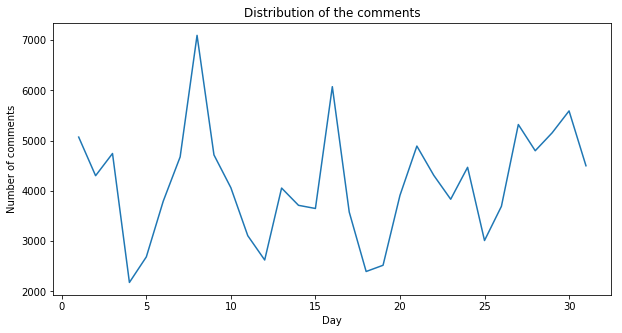

In [14]:
plt.figure(figsize=(10,5))
plt.plot(buckets_2008['created_utc'],buckets_2008['counts'])
plt.ylabel('Number of comments')
plt.xlabel('Day')
plt.title('Distribution of the comments')
plt.show()

On the 7th Octobre, there was the second debate and the third one on the 15. This can be seen by an increase number of messages the day (or the next day, since the data is UTC-time based).

### 2012

In [15]:
days_2012 = df_2012.copy()
days_2012['created_utc'] = df_2012['created_utc'].dt.day
gr_2012 = days_2012.groupby(['created_utc'])
buckets_2012 = gr_2012.size().reset_index(name='counts')

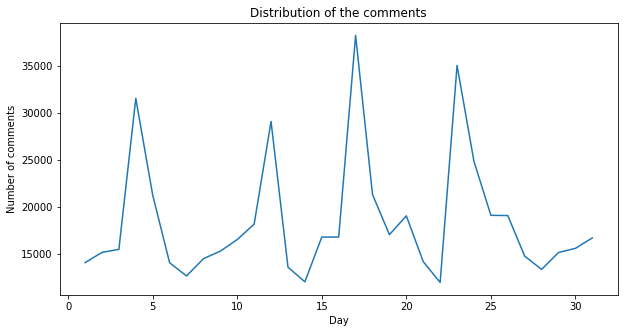

In [16]:
plt.figure(figsize=(10,5))
plt.plot(buckets_2012['created_utc'],buckets_2012['counts'])
plt.ylabel('Number of comments')
plt.xlabel('Day')
plt.title('Distribution of the comments')
plt.show()

On this years, the debates are on the 3rd, 16th and 24th Octobre. We see an increase number of comments on these dates.

### 2016

In [17]:
days_2016 = df_2016.copy()
days_2016['created_utc'] = df_2016['created_utc'].dt.day
gr_2016 = days_2016.groupby(['created_utc'])
buckets_2016 = gr_2016.size().reset_index(name='counts')

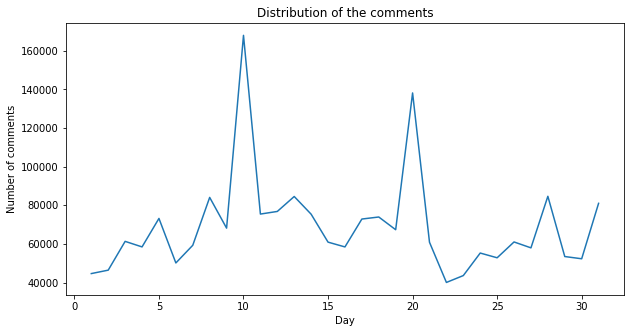

In [18]:
plt.figure(figsize=(10,5))
plt.plot(buckets_2016['created_utc'],buckets_2016['counts'])
plt.ylabel('Number of comments')
plt.xlabel('Day')
plt.title('Distribution of the comments')
plt.show()

We can see a lot of comments on the 10th Octobre. This date correspond to the second Hillary-Trump debate. <br/> 
On the 20th, it is the last debate between the two candidates   

## Occurence of candidates
#### 2008

In [19]:
obama_2008 = days_2008.copy()
obama_2008 = obama_2008.where(obama_2008['body'].str.contains('Obama'))
obama_2008 = obama_2008.dropna()
len(obama_2008.index)

13259

In [20]:
mccain_2008 = days_2008.copy()
mccain_2008 = mccain_2008.where(mccain_2008['body'].str.contains('McCain'))
mccain_2008 = mccain_2008.dropna()
len(mccain_2008.index)

12511

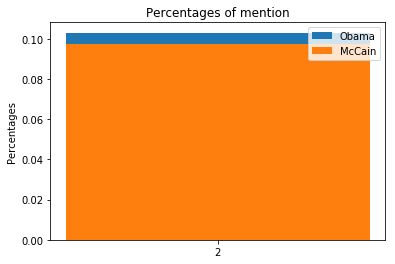

In [21]:
perc_ob08 = len(obama_2008.index)/(len(df_2008.index))
perc_mc = len(mccain_2008.index)/(len(df_2008.index))

p1 = plt.bar([2016], perc_ob08)
p2 = plt.bar([2016], perc_mc)


plt.ylabel('Percentages')
plt.title('Percentages of mention')
plt.xticks([2016], ('2016'))
plt.legend((p1[0], p2[0]), ('Obama', 'McCain'))


Both candidates have similar mention in the reddits comments.

Here are the best comments mentionnig each candidates

In [22]:
best_ob_comm_2008 = obama_2008.sort_values(by='score', ascending=False)
print('Best comment with score :', best_ob_comm_2008["score"].values[0], '\n',best_ob_comm_2008['body'].values[0],'\n\n')
print('Second best with score :', best_ob_comm_2008["score"].values[1], '\n', best_ob_comm_2008['body'].values[1])

Best comment with score : 847.0 
 It said "What's Obama doing hangin' out with Bill Ayers?" 


Second best with score : 623.0 
 This is all well and good, the presidential nominee was a nice guy twenty years ago.

But what you should be taking away from this story is not that the guy you want to be president acts in a way that you approve.  What you should be taking away is that one day, when you're in the same situation, you help someone else out.  That's what Obama's campaign is about: not that Obama is great, but that America is great, and we have to do our best to remember that.


In [23]:
best_mc_comm = mccain_2008.sort_values(by='score', ascending=False)
print('Best comment with score :', best_mc_comm["score"].values[0], '\n',best_mc_comm['body'].values[0], '\n\n')
print('Second best with score :', best_mc_comm["score"].values[1], '\n', best_mc_comm['body'].values[1])

Best comment with score : 593.0 
 Yeah, but for all us rapists out here, it's a breath of fresh air.

Join my facebook group!  *Rapists for McCain/Palin*

(How can anyone vote Republican right now?  What is wrong with people?) 


Second best with score : 584.0 
 Come on guys, let's be fair. When John McCain was studying mathematics in ancient Babylonia as he grew up, they hadn't yet discovered zero, so I can understand his confusion.


However, the best comments regarding Obama see him in a good way, where the ones regarding McCain are negatives.

#### 2012

In [24]:
obama_2012 = days_2012.copy()
obama_2012 = obama_2012.where(obama_2012['body'].str.contains('Obama'))
obama_2012 = obama_2012.dropna()
len(obama_2012.index)

64286

In [25]:
romney_2012 = days_2012.copy()
romney_2012 = romney_2012.where(romney_2012['body'].str.contains('Romney'))
romney_2012 = romney_2012.dropna()
len(romney_2012.index)

63096

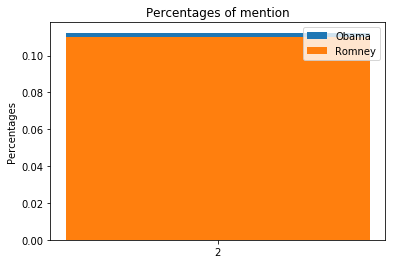

In [26]:
perc_ob12 = len(obama_2012.index)/(len(df_2012.index))
perc_ro = len(romney_2012.index)/(len(df_2012.index))

p1 = plt.bar([2012], perc_ob12)
p2 = plt.bar([2012], perc_ro)


plt.ylabel('Percentages')
plt.title('Percentages of mention')
plt.xticks([2012], ('2012'))
plt.legend((p1[0], p2[0]), ('Obama', 'Romney'))


Again, both candidates are quite equal in mention.
<br/>Let's see the best comments

In [27]:
best_ob_comm_2012 = obama_2012.sort_values(by='score', ascending=False)
print('Best comment with score :', best_ob_comm_2012["score"].values[0], '\n', best_ob_comm_2012['body'].values[0], '\n\n')
print('Second best with score :', best_ob_comm_2012["score"].values[1], '\n', best_ob_comm_2012['body'].values[1])

Best comment with score : 2371.0 
 Mitt Romney on Obama's Foreign policy "You can't kill your way out of this problem"...60 seconds later..."my policy is simple, go after the bad guys...and kill them" 


Second best with score : 1874.0 
 Romney said he would take 8 to10 years to balance the budget if he were president, why is he harping on Obama for not doing it in 4 years? 


In [28]:
best_ro_comm = romney_2012.sort_values(by='score', ascending=False)
print('Best comment with score :', best_ro_comm["score"].values[0], '\n', best_ro_comm['body'].values[0], '\n\n')
print('Second best with score :', best_ro_comm["score"].values[1], '\n', best_ro_comm['body'].values[1])

Best comment with score : 2371.0 
 Mitt Romney on Obama's Foreign policy "You can't kill your way out of this problem"...60 seconds later..."my policy is simple, go after the bad guys...and kill them" 


Second best with score : 2084.0 
 Mitt Romney, I generally think you are an intelligent man who is worthy of my respect. However, you have NO IDEA what you're talking about when it comes to education. You can't in one sentence say that teacher's unions are bad, that class size doesn't matter and neither does teacher pay, and then in the VERY NEXT SENTENCE brag about the fact that Massachusetts has the highest test scores in the country. Wanna know why? Because Massachusetts has the highest test scores in the country because you have the strongest teachers' unions, the lowest class size, and the highest teacher pay. Your schools are so good for the very reasons you claim don't matter/aren't important.


However, even if the best comments are mentioning Romney, none of them seems to support him.

#### 2016

In [29]:
trump_2016 = days_2016.copy()
trump_2016 = trump_2016.where(trump_2016['body'].str.contains('Trump'))
trump_2016 = trump_2016.dropna()
len(trump_2016.index)

322136

In [30]:
clinton_2016 = days_2016.copy()
clinton_2016 = clinton_2016.where(clinton_2016['body'].str.contains('Clinton'))
clinton_2016 = clinton_2016.dropna()
len(clinton_2016.index)

133738

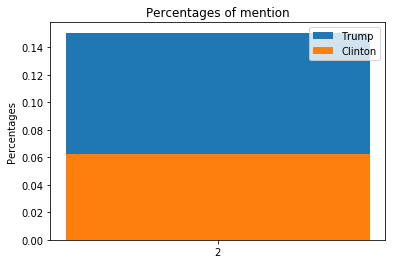

In [31]:
perc_tr = len(trump_2016.index)/(len(df_2016.index))
perc_cl = len(clinton_2016.index)/(len(df_2016.index))

p1 = plt.bar([2016], perc_tr)
p2 = plt.bar([2016], perc_cl)


plt.ylabel('Percentages')
plt.title('Percentages of mention')
plt.xticks([2016], ('2016'))
plt.legend((p1[0], p2[0]), ('Trump', 'Clinton'))


In [32]:
best_tr_comm = trump_2016.sort_values(by='score', ascending=False)
print('Best comment with score :', best_tr_comm["score"].values[0], '\n',best_tr_comm['body'].values[0], '\n\n')
print('Second best with score :', best_tr_comm["score"].values[1], '\n', best_tr_comm['body'].values[1])

Best comment with score : 4948.0 
 The full statement from Warren Buffett:

&gt; Answering a question last night about his $916 million income tax loss carryforward in 1995, Donald Trump stated that "Warren Buffett took a massive deduction." Mr. Trump says he knows more about taxes than any other human. He has not seen my income tax returns. But I am happy to give him the facts.

&gt; My 2015 return shows adjusted gross income of $11,563,931. My deductions totaled $5,477,694, of which *allowable* charitable contributions were $3,469,179. All but $36,037 of the remainder was for state income taxes.

&gt; The total charitable contributions I made during the year were $2,858,057,970 of which more than $2.85 billion were not taken as deductions and never will be. Tax law properly limits charitable deductions.

&gt; My federal income tax for the year was $1,845,557. Returns for previous years are of a similar nature in respect to contributions, deductions and tax rates.

&gt; I have paid fe

In [3]:
best_cl_comm = clinton_2016.sort_values(by='score', ascending=False)
print('Best comment : \n',best_cl_comm['body'].values[0], '\n\n')
print('Second best : \n', best_cl_comm['body'].values[1])

NameError: name 'clinton_2016' is not defined

<img src=https://pbs.twimg.com/media/CvJA_nFWEAESx1C.jpg>

For this one, it's harder to say something with only these few comments, but it seems people dislikes Trump.

In [2]:
import spacy